In [1]:
# Load data from training data directory, convert from NPZ to tensor, and save to a dict
# containing lift name and tensor data

import os
import torch
import numpy as np
import functions
import matplotlib.pyplot as plt

DEADLIFT_TENSORS = {}
BENCH_TENSORS = {}
SQUAT_TENSORS = {}

# Setup paths
script_dir = os.path.dirname(os.path.abspath("model_train.ipynb"))
data_dir = os.path.normpath(os.path.join(script_dir, '..', 'lift data'))

# Step 1: Get all subfolder names in data_dir
subfolders = []
for f in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, f)):
        subfolders.append(f)


#  Squat Files
#  Bench Files
#  Deadlift Files
for subfolder in subfolders:
    subfolder_path = os.path.join(data_dir, subfolder)
    files = []

    # Isolate individual lift files in each of the subfolders and add them to files list
    for f in os.listdir(subfolder_path):
        if os.path.isfile(os.path.join(subfolder_path, f)):
            files.append(f)

    # Iterate through files in each subfolder
    for file in files:
        data = np.load(os.path.join(subfolder_path, file))

        # convert each landmark/angle to a tensor and add it to the tensor dict (which is
        # specific to the current lift only
        tensor_dict = {}
        for key in data.files:
            lift_name_without_video_type = " ".join(key.split('.')[:1] + key.split("_")[-2:])
            tensor_dict[lift_name_without_video_type] = torch.tensor(data[key])
        if file.split('.')[0].startswith('bench'):
            BENCH_TENSORS[file.split('.')[0]] = tensor_dict
        if file.split('.')[0].startswith('deadlift'):
            DEADLIFT_TENSORS[file.split('.')[0]] = tensor_dict
        if file.split('.')[0].startswith('squat'):
            SQUAT_TENSORS[file.split('.')[0]] = tensor_dict

In [2]:
BENCH_TENSORS['bench 3 good lift data'].keys()

dict_keys(['bench 3 good landmark 0', 'bench 3 good landmark 1', 'bench 3 good landmark 2', 'bench 3 good landmark 3', 'bench 3 good landmark 4', 'bench 3 good landmark 5', 'bench 3 good landmark 6', 'bench 3 good landmark 7', 'bench 3 good landmark 8', 'bench 3 good landmark 9', 'bench 3 good landmark 10', 'bench 3 good landmark 11', 'bench 3 good landmark 12', 'bench 3 good landmark 13', 'bench 3 good landmark 14', 'bench 3 good landmark 15', 'bench 3 good landmark 16', 'bench 3 good landmark 17', 'bench 3 good landmark 18', 'bench 3 good landmark 19', 'bench 3 good landmark 20', 'bench 3 good landmark 21', 'bench 3 good landmark 22', 'bench 3 good landmark 23', 'bench 3 good landmark 24', 'bench 3 good landmark 25', 'bench 3 good landmark 26', 'bench 3 good landmark 27', 'bench 3 good landmark 28', 'bench 3 good landmark 29', 'bench 3 good landmark 30', 'bench 3 good landmark 31', 'bench 3 good landmark 32', 'bench 3 good left elbow', 'bench 3 good right elbow', 'bench 3 good left k

In [3]:
for k,v in BENCH_TENSORS.items():
    print(k)
    for key in v.keys():

        try:
            print(f"---{key} contains a {type(v[key])} containing Z coords for {functions.landmark_indeces_to_labels[int(key.split(' ')[-1])]} that contains ({len(v[key])} points)")
        except:
            print(f"---{key} contains a {type(v[key])} containing joint angles for {' '.join(key.split('_')[-2:])} that contains ({len(v[key])} angles)")


bench 3 good lift data
---bench 3 good landmark 0 contains a <class 'torch.Tensor'> containing Z coords for nose that contains (3 points)
---bench 3 good landmark 1 contains a <class 'torch.Tensor'> containing Z coords for left eye inner that contains (3 points)
---bench 3 good landmark 2 contains a <class 'torch.Tensor'> containing Z coords for left eye that contains (3 points)
---bench 3 good landmark 3 contains a <class 'torch.Tensor'> containing Z coords for left eye outer that contains (3 points)
---bench 3 good landmark 4 contains a <class 'torch.Tensor'> containing Z coords for right eye inner that contains (3 points)
---bench 3 good landmark 5 contains a <class 'torch.Tensor'> containing Z coords for right eye that contains (3 points)
---bench 3 good landmark 6 contains a <class 'torch.Tensor'> containing Z coords for right eye outer that contains (3 points)
---bench 3 good landmark 7 contains a <class 'torch.Tensor'> containing Z coords for left ear that contains (3 points)
--

In [4]:
for key, value in DEADLIFT_TENSORS.items():
    print(key)
    # for landmark, coordinate in BENCH_TENSORS[key].items():
    #     return (landmark, coordinate[2])

deadlift 1 good lift data
deadlift 2 good lift data
deadlift 4 bad lift data
deadlift 5 good lift data
deadlift 6 good lift data


In [5]:
DEADLIFT_TENSORS['deadlift 6 good lift data'].keys()

dict_keys(['deadlift 6 good landmark 0', 'deadlift 6 good landmark 1', 'deadlift 6 good landmark 2', 'deadlift 6 good landmark 3', 'deadlift 6 good landmark 4', 'deadlift 6 good landmark 5', 'deadlift 6 good landmark 6', 'deadlift 6 good landmark 7', 'deadlift 6 good landmark 8', 'deadlift 6 good landmark 9', 'deadlift 6 good landmark 10', 'deadlift 6 good landmark 11', 'deadlift 6 good landmark 12', 'deadlift 6 good landmark 13', 'deadlift 6 good landmark 14', 'deadlift 6 good landmark 15', 'deadlift 6 good landmark 16', 'deadlift 6 good landmark 17', 'deadlift 6 good landmark 18', 'deadlift 6 good landmark 19', 'deadlift 6 good landmark 20', 'deadlift 6 good landmark 21', 'deadlift 6 good landmark 22', 'deadlift 6 good landmark 23', 'deadlift 6 good landmark 24', 'deadlift 6 good landmark 25', 'deadlift 6 good landmark 26', 'deadlift 6 good landmark 27', 'deadlift 6 good landmark 28', 'deadlift 6 good landmark 29', 'deadlift 6 good landmark 30', 'deadlift 6 good landmark 31', 'deadli

In [6]:
all_deadlift_joint_angles = functions.joint_angles_to_list(DEADLIFT_TENSORS)
all_bench_joint_angles = functions.joint_angles_to_list(BENCH_TENSORS)
all_squat_joint_angles = functions.joint_angles_to_list(SQUAT_TENSORS)

# Example of one output for one lift (in this case, deadlift 1 good is the first to be
# processed, so it is at index 0 of our array. We can now iterate over this array with our
# model to learn patterns
all_squat_joint_angles

[{'name': 'squat',
  'viewing from': 'left',
  'label': 'good',
  'angles': {'left elbow': tensor([19, 19, 18,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  4,  4, 21],
          dtype=torch.int32),
   'right elbow': tensor([ 6,  7,  7,  5,  5,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7, 24],
          dtype=torch.int32),
   'left knee': tensor([132, 122, 112, 106, 103, 102, 104, 109, 117, 126, 136, 145, 154, 162,
           166, 169], dtype=torch.int32),
   'right knee': tensor([128, 116, 104,  97,  93,  92,  94, 100, 108, 118, 129, 142, 154, 164,
           171, 173], dtype=torch.int32),
   'right hip': tensor([128, 115, 102,  94,  90,  89,  91,  97, 104, 113, 124, 136, 148, 157,
           164, 166], dtype=torch.int32),
   'left hip': tensor([132, 123, 115, 108, 104, 102, 104, 109, 117, 126, 135, 144, 153, 161,
           166, 171], dtype=torch.int32),
   'left shoulder': tensor([18, 19, 19, 21, 21, 20, 20, 21, 21, 21, 21, 20, 20, 20, 20, 21],
          dtype=torch.int32),
   'right shoulder

In [7]:
import random

def split_data(data_list, train_ratio, seed):
    random.seed(seed)
    random.shuffle(data_list)
    split_index = int(len(data_list) * train_ratio)
    train_set = data_list[:split_index]
    test_set = data_list[split_index:]
    return train_set, test_set

train_ratio = 0.8
seed = 42

deadlift_train, deadlift_test = split_data(all_deadlift_joint_angles, train_ratio, seed)
bench_train, bench_test = split_data(all_bench_joint_angles, train_ratio, seed)
squat_train, squat_test = split_data(all_squat_joint_angles, train_ratio, seed)

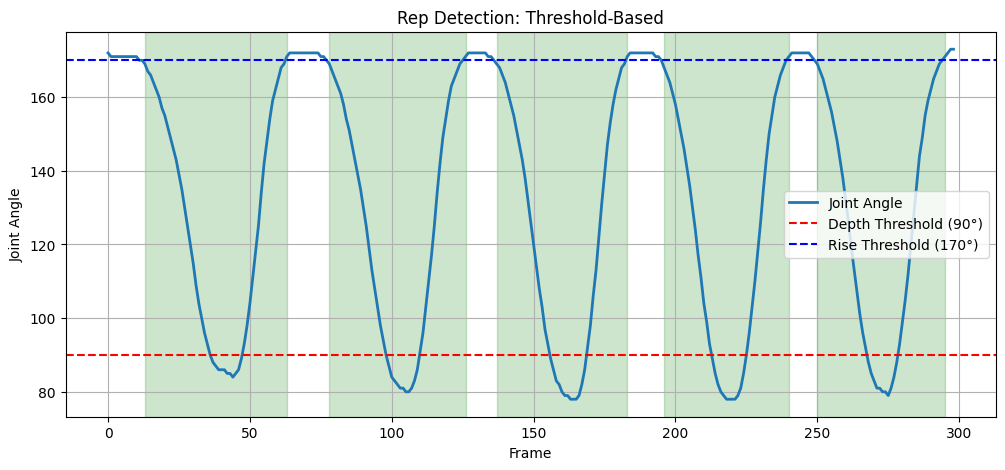

[(13, 63), (78, 126), (137, 183), (196, 240), (250, 295)]

In [49]:
# EXAMPLE OF SPLITTING LIFT DATA INTO INDIVIDUAL REPS
# via ChatGPT
from scipy.signal import find_peaks, savgol_filter
import torch
import numpy as np
import matplotlib.pyplot as plt

def detect_reps_by_threshold(lift_name: str, joint_tensor: torch.Tensor, depth_thresh, rise_thresh, min_frames=4, plot=False):

    signal = joint_tensor
    rep_ranges = []
    in_rep = False
    start = 1

    if lift_name != "deadlift":
        for i in range(1, len(signal)):
            if signal[i] < rise_thresh and not in_rep:
                in_rep = True
                start = i
            elif signal[i] > rise_thresh and in_rep:
                end = i
                if end - start >= min_frames:
                    rep_ranges.append((start, end))
                start = None
                in_rep = False
                continue
    else:
        start = 1
        ascending = True
        highest_valley = float('inf')
        for i in range(1, len(signal)):

            if signal[i - 1] < signal[i] and not ascending:
                print(i, ' valley')
                highest_valley = min(highest_valley, int(signal[i]))
                end = i - 2
                if end - start >= min_frames:
                    rep_ranges.append((start, end))
                start = i - 1
                ascending =  True

            elif signal[i - 1] > signal[i] and ascending:
                print(i, 'peak')
                ascending = False

            elif signal[i - 1] < signal[i] and not ascending:
                print(i, ' hill')
                ascending = True
        print(highest_valley)
        j = 0
        while j < len(signal) and signal[j] < highest_valley:
            j += 1
        rep_ranges[0] = (j, rep_ranges[0][1])

        print(rep_ranges)


    if plot:
        plt.figure(figsize=(12, 5))
        plt.plot(signal, label='Joint Angle', linewidth=2)
        for s, e in rep_ranges:
            plt.axvspan(s, e, color='green', alpha=0.2)
        plt.axhline(y=depth_thresh, color='red', linestyle='--', label=f'Depth Threshold ({depth_thresh}°)')
        plt.axhline(y=rise_thresh, color='blue', linestyle='--', label=f'Rise Threshold ({rise_thresh}°)')
        plt.title("Rep Detection: Threshold-Based")
        plt.xlabel("Frame")
        plt.ylabel("Joint Angle")
        plt.legend()
        plt.grid(True)
        plt.show()

    return rep_ranges




right_knee = SQUAT_TENSORS['squat 2 good lift data']['squat 2 good right hip']
right_hip = DEADLIFT_TENSORS['deadlift 1 good lift data']['deadlift 1 good right hip']

rep_ranges = detect_reps_by_threshold(lift_name='squat',
                                      joint_tensor=right_knee,
                                      plot=True,
                                      depth_thresh=90,
                                      rise_thresh=170)
rep_ranges

In [9]:
deadlift_split_reps = functions.split_lifts_into_reps(deadlift_train, joint='hip')
print(f"Split {len(deadlift_train)} full lifts into {len(deadlift_split_reps)} total reps.")
squat_split_reps = functions.split_lifts_into_reps(squat_train, joint='knee')
bench_split_reps = functions.split_lifts_into_reps(bench_train, joint='elbow')

deadlift 6 good landmark 0 torch.Size([3, 99])
deadlift 6 good landmark 1 torch.Size([3, 99])
deadlift 6 good landmark 2 torch.Size([3, 99])
deadlift 6 good landmark 3 torch.Size([3, 99])
deadlift 6 good landmark 4 torch.Size([3, 99])
deadlift 6 good landmark 5 torch.Size([3, 99])
deadlift 6 good landmark 6 torch.Size([3, 99])
deadlift 6 good landmark 7 torch.Size([3, 99])
deadlift 6 good landmark 8 torch.Size([3, 99])
deadlift 6 good landmark 9 torch.Size([3, 99])
deadlift 6 good landmark 10 torch.Size([3, 99])
deadlift 6 good landmark 11 torch.Size([3, 99])
deadlift 6 good landmark 12 torch.Size([3, 99])
deadlift 6 good landmark 13 torch.Size([3, 99])
deadlift 6 good landmark 14 torch.Size([3, 99])
deadlift 6 good landmark 15 torch.Size([3, 99])
deadlift 6 good landmark 16 torch.Size([3, 99])
deadlift 6 good landmark 17 torch.Size([3, 99])
deadlift 6 good landmark 18 torch.Size([3, 99])
deadlift 6 good landmark 19 torch.Size([3, 99])
deadlift 6 good landmark 20 torch.Size([3, 99])
de

In [10]:
squat_split_reps

[{'name': 'squat',
  'viewing from': 'right',
  'label': 'good',
  'angles': {'left elbow': tensor([  5,   4,   4,   4,   3,   2,   2,   2,   2,   3,   3,   3,   3,   5,
             6,   7,   8,   9,  27,  43,  61,  79,  96, 113, 129, 146, 162, 178,
           177, 176, 175, 174, 173, 172, 171, 170, 169, 153, 148, 148, 134, 119,
           103,  86,  70,  53,  37,  36,  26,   8,   7,   6,   6,   6,   5,   5,
             5,   4,   4,   3,   3,   2,   1,   0,   0,   0,   1,   1],
          dtype=torch.int32),
   'right elbow': tensor([3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
           3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5,
           4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2],
          dtype=torch.int32),
   'left knee': tensor([ 69,  66,  64,  62,  61,  60,  61,  62,  64,  68,  73,  80,  89,  98,
           107, 118, 128, 138, 148, 156, 162, 167, 171, 174, 176, 177, 178, 178,
           178, 178, 178, 1

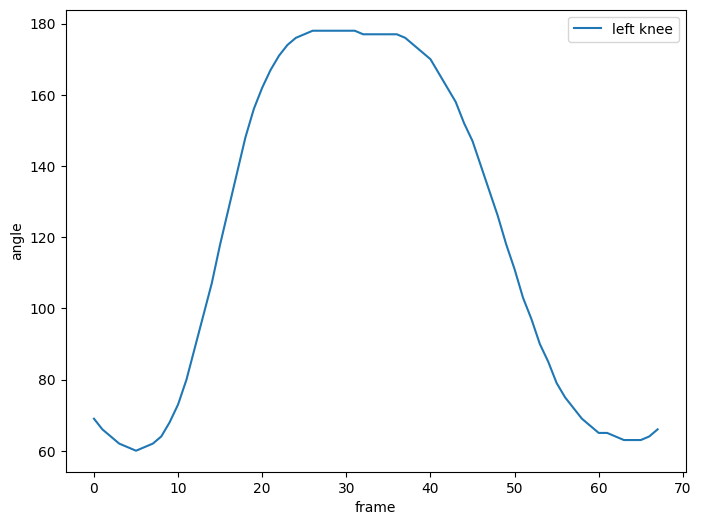

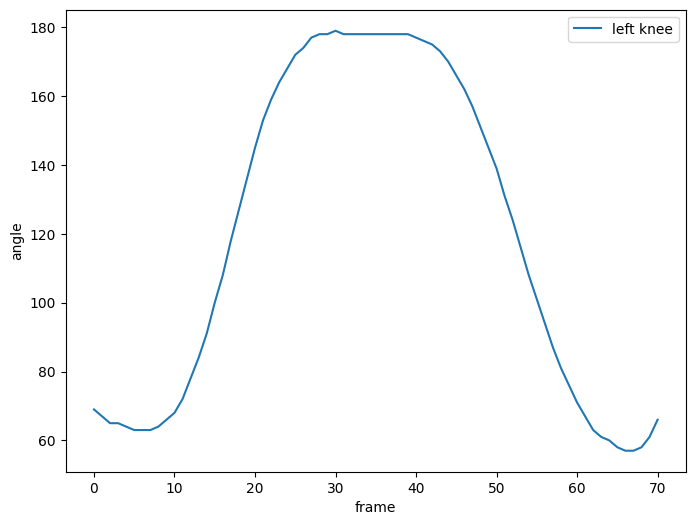

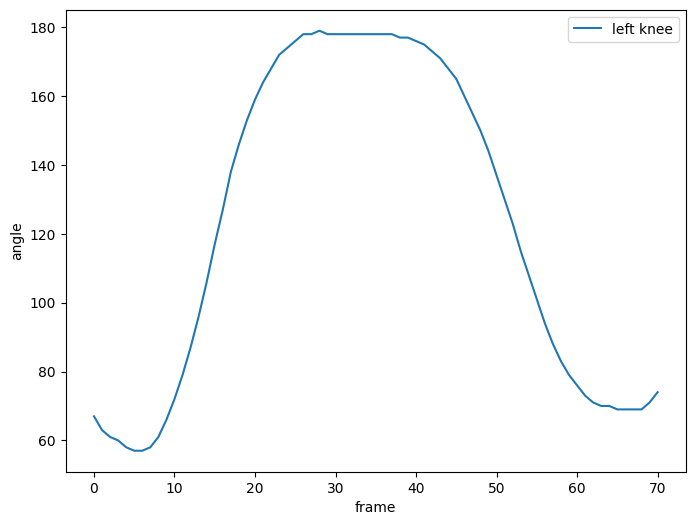

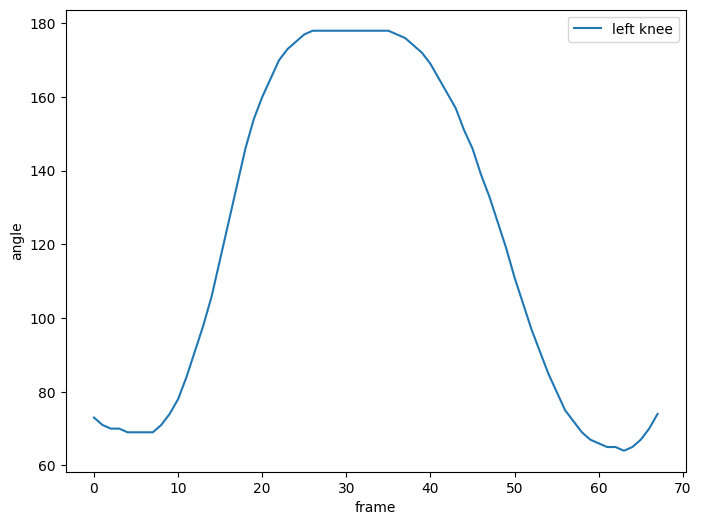

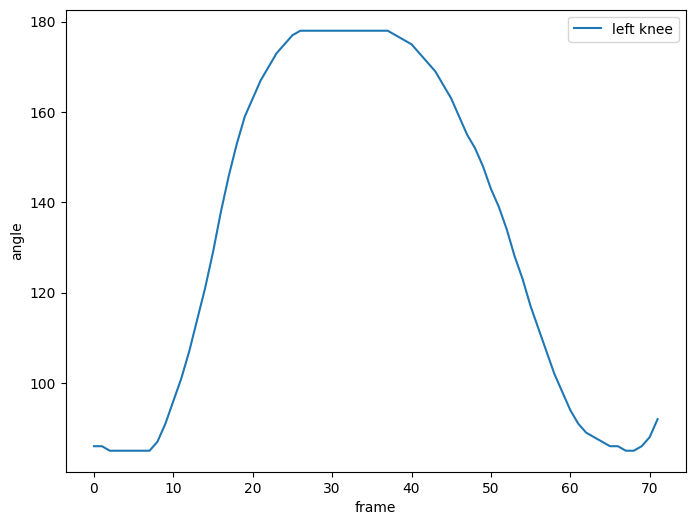

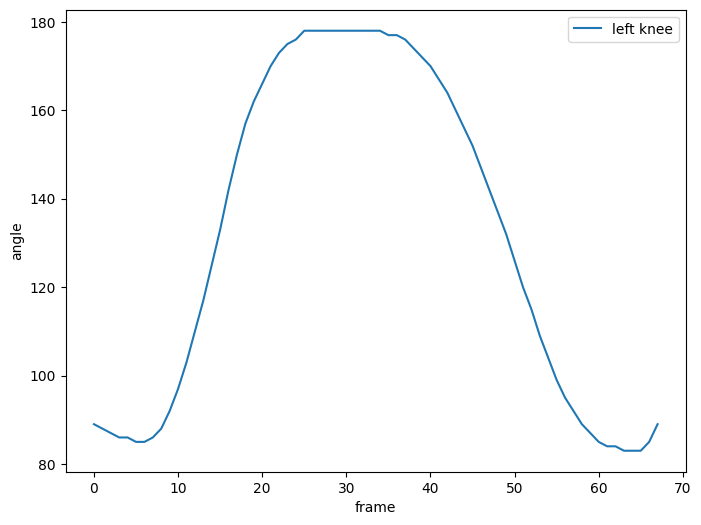

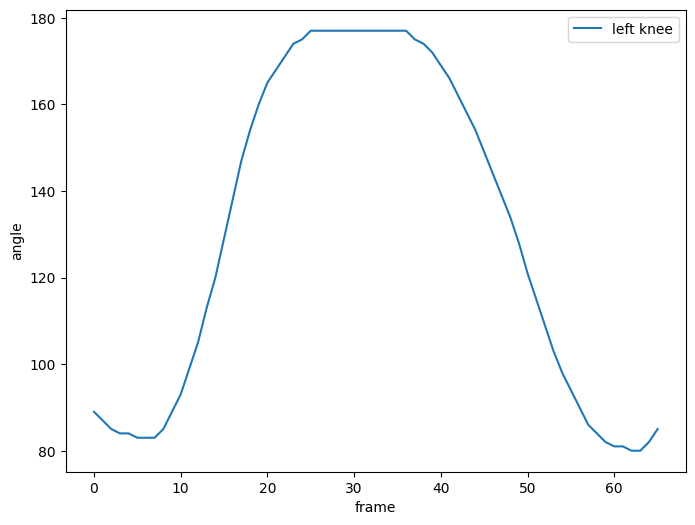

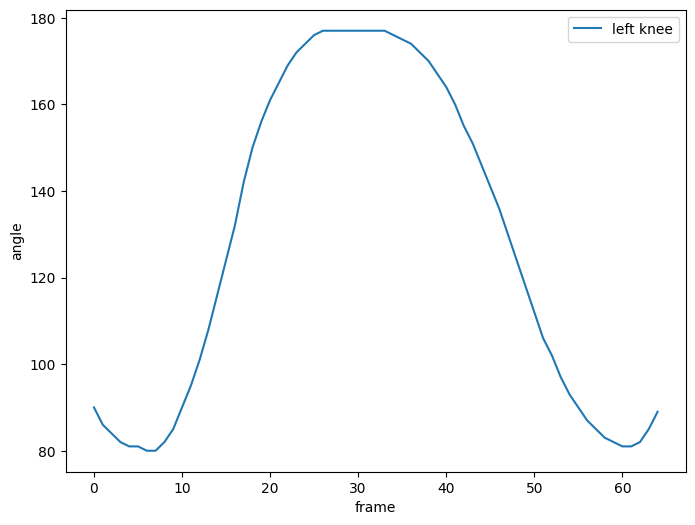

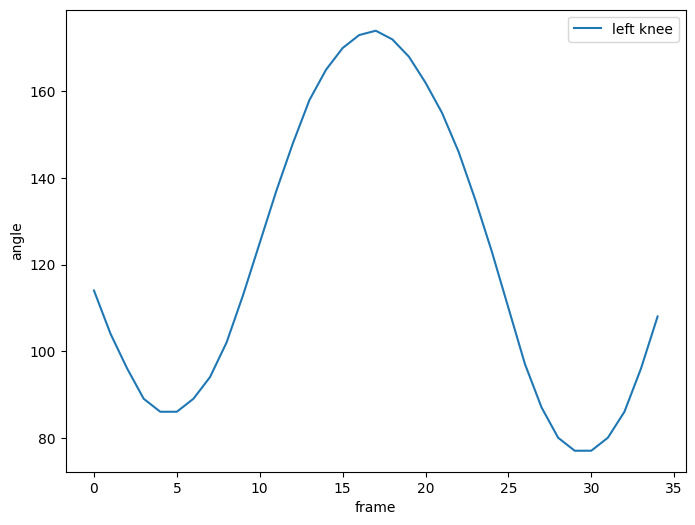

In [11]:
for rep in squat_split_reps:
    plt.figure(figsize=[8,6])
    plt.plot(rep['angles']['left knee'], label='left knee')
    plt.xlabel('frame')
    plt.ylabel('angle')
    plt.legend()
    plt.show()